In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('Movie genere classification.csv')

In [5]:
df

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0
...,...,...
49964,This movie is terrible. It's about some no bra...,0
49965,"Well, what was fun... except for the fun part....",0
49966,By the time this film was released I had seen ...,0
49967,"Well, if you like pop/punk, punk, ska, and a t...",0


In [6]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


In [7]:
df.info

<bound method DataFrame.info of                                                   review  sentiment
0      This movie is just crap. Even though the direc...          0
1      Another detailed work on the subject by Dr Dwi...          1
2      THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...          0
3      Like with any movie genre, there are good gang...          0
4      I watched it with my mom and we were like...<b...          0
...                                                  ...        ...
49964  This movie is terrible. It's about some no bra...          0
49965  Well, what was fun... except for the fun part....          0
49966  By the time this film was released I had seen ...          0
49967  Well, if you like pop/punk, punk, ska, and a t...          0
49968  Where this movie is faithful to Burroughs' vis...          1

[49969 rows x 2 columns]>

In [8]:
df.describe()

,sentiment
count,49969.000000
mean,0.499950
std,0.500005
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


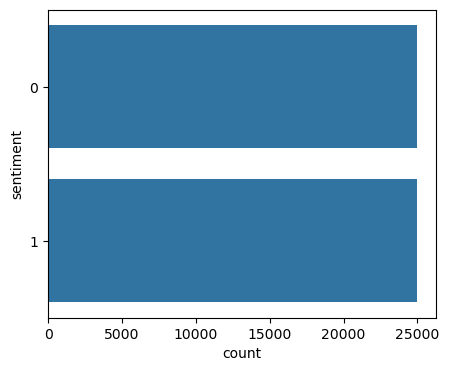

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(y=df['sentiment'])                                          #check for imbalance data
plt.show()

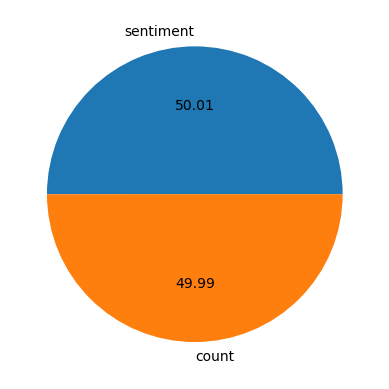

In [10]:
plt.pie(df['sentiment'].value_counts(),labels=['sentiment','count'],autopct='%0.2f')
plt.show()

In [11]:
import re
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

In [12]:
def preprocess(sentence): 
    text = re.sub(r"[^a-zA-Z0-9]","",sentence).split() 

    words= [x.lower() for x in text if x not in stopwords.words('english')] 


    lemma = wordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words]

    word = ''.join (word)
    return word
            



In [13]:
for i in range (10): 
    print(df['review'][i])
    print()

This movie is just crap. Even though the directors claim to be part of that oi-culture, it's still a very, very bad directorial debut. The topic itself is very interesting and I accept the bad acting due to the fact, that they are all amateurs and never acted before, but the worst thing about this film are the dialogs and very unexperienced and naive directing. There's no timing at all in that movie. I felt like the directors were so exited to do that movie (it's their first feature), that they actually never really asked themselves, what story they wanna tell. I met Ben (one of the directors) on several occasions and he's a nice and thoughtful guy, but that doesn't make him a director. I think, that "American History X" is full of clichÃ©s, but somehow manages to transport a story. "Oi!Warning" is full of clichÃ©s, doesn't tell anything new or provocative and (-that's the sad thing about this movie) it's far from any Oi!-Reality.<br /><br />If you wanna see weird but great German film

In [14]:
x= df['review']                                             #split the data into x and y
y = df['sentiment']

In [15]:
df

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0
...,...,...
49964,This movie is terrible. It's about some no bra...,0
49965,"Well, what was fun... except for the fun part....",0
49966,By the time this film was released I had seen ...,0
49967,"Well, if you like pop/punk, punk, ska, and a t...",0


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
df = pd.DataFrame(x)

In [18]:
vectorizer = CountVectorizer(binary=True,max_features=10000)
binarymatrix = vectorizer.fit_transform(df['review'])

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
tokenizer = Tokenizer (num_words=10000)

## Spliting the xtest,ytest,xtrain,y train

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20)

In [23]:
x

0        This movie is just crap. Even though the direc...
1        Another detailed work on the subject by Dr Dwi...
2        THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...
3        Like with any movie genre, there are good gang...
4        I watched it with my mom and we were like...<b...
                               ...                        
49964    This movie is terrible. It's about some no bra...
49965    Well, what was fun... except for the fun part....
49966    By the time this film was released I had seen ...
49967    Well, if you like pop/punk, punk, ska, and a t...
49968    Where this movie is faithful to Burroughs' vis...
Name: review, Length: 49969, dtype: object

In [24]:
def text_encoding(x):
    seq = tokenizer.texts_to_sequences(x)
    seq = pad_sequences(seq, maxlen=65, padding='post')
    return seq

In [25]:
tokenizer.fit_on_texts(xtrain)
xtrain = text_encoding(xtrain)
xtest = text_encoding(xtest)

In [26]:
xtrain

array([[   9,    6,   24, ..., 1052,    7,    7],
       [ 626,   12,   11, ...,   11,   10,  164],
       [   7,    7,   27, ...,    3, 7327,  361],
       ...,
       [  11,   17,   45, ...,    0,    0,    0],
       [ 837,   20,  869, ...,  800,  189,   54],
       [  20,  837,    2, ...,  234,  155,  407]])

In [27]:
xtest

array([[2943,   43,  123, ...,    0,    0,    0],
       [   1,   86, 7836, ...,    7,  725,  155],
       [  71, 2624,    5, ...,   37,   56, 1713],
       ...,
       [  77,    9,   34, ..., 1210,    8, 1085],
       [ 421,  491,    2, ...,  596,   12,  400],
       [   5,  501,  629, ...,   13,  487,  487]])

In [28]:
ytrain = np.array(ytrain).reshape(-1, 1)

In [29]:
ytrain

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [30]:
xtrain.shape

(39975, 65)

In [31]:
ytrain.shape

(39975, 1)

In [32]:
vocab_size = len(tokenizer.word_index) +1
def text_encoding(): 

    encoded_docs = tokenizert.texts_to_sequences(txt)

    padded_sequence = pad_sequences(encoded_docs,max= 128)

    return padded_sequence
    

In [33]:
vocab_size

112151

In [34]:
from keras import Sequential
from keras import layers

In [55]:
model = Sequential()
model.add(layers.Embedding(vocab_size,128, input_length = 128)) 
model.add(layers.LSTM(128, return_sequences=True)) 
model.add(layers.Dropout(0.2))
model.add(layers.LSTM (128))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation = 'sigmoid'))

C:\Users\sreer\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [61]:
print(f"xtrain sahape:{xtrain.shape}")
print (f"ytrain shape: {ytrain.shape}")

xtrain sahape:(39975, 65)
ytrain shape: (39975, 1)


In [63]:
model.fit(xtrain,ytrain,epochs=5,validation_split=0.2)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 300s 292ms/step - accuracy: 0.7360 - loss: 0.5021 - val_accuracy: 0.8412 - val_loss: 0.3863
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 292s 292ms/step - accuracy: 0.8894 - loss: 0.2735 - val_accuracy: 0.8410 - val_loss: 0.3779
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 218s 218ms/step - accuracy: 0.9286 - loss: 0.1897 - val_accuracy: 0.8385 - val_loss: 0.4293
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 292s 248ms/step - accuracy: 0.9553 - loss: 0.1265 - val_accuracy: 0.8360 - val_loss: 0.5220
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 302s 302ms/step - accuracy: 0.9726 - loss: 0.0832 - val_accuracy: 0.8301 - val_loss: 0.5810


In [64]:
ypred = model.predict(xtest)     

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step


In [67]:
ypred = [np.argmax(i) for i in ypred]

In [69]:
len(ytest)

9994

In [71]:
len(ypred)

9994

In [73]:
ypred = [np.argmax(i) for i in ypred]

In [75]:
ypred[0]

0

In [79]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score              #evaluate the model 

In [81]:
accuracy_score(ytest, ypred)

0.49659795877526514

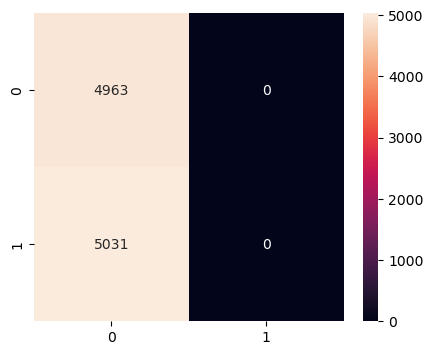

In [83]:
plt.figure(figsize = (5,4))
sns.heatmap(confusion_matrix(ytest, ypred), annot = True, fmt = 'd')                      #confusion matrix
plt.show()

In [85]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      4963
           1       0.00      0.00      0.00      5031

    accuracy                           0.50      9994
   macro avg       0.25      0.50      0.33      9994
weighted avg       0.25      0.50      0.33      9994



C:\Users\sreer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sreer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sreer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
